#E-commerce Retail User Churn

## 1. Introduction
This notebook demonstrates the process of detecting user churn in an e-commerce retail setting using machine learning techniques.

####Dataset: https://www.kaggle.com/datasets/fridrichmrtn/user-churn-dataset

## 2. Data Import and Exploration

### 2.1 Import Libraries
Import necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##2.2 Load Data
Load the e-commerce dataset.

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,1
1,50002,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1
2,50003,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,1
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,1
4,50005,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,1


##2.3 Data Overview
Get a brief overview of the dataset.

In [ ]:
df.describe()


,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000,5630.000000
mean,52815.500000,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030,0.168384
std,1625.385339,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036,0.374240
min,50001.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51408.250000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000,0.000000
50%,52815.500000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000,0.000000
75%,54222.750000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500,0.000000
max,55630.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000,1.000000


In [ ]:


df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_values_str = ', '.join(map(str, unique_values))
    print(f"Unique values in '{column}' column: {unique_values_str}")


Unique values in 'CustomerID' column: 50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50076, 50077, 50078, 50079, 50080, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, 50101, 50102, 50103, 50104, 50105, 50106, 50107, 50108, 50109, 50110, 50111, 50112, 50113, 50114, 50115, 50116, 50117, 50118, 50119, 50120, 50121, 50122, 50123, 50124, 50125, 50126, 50127, 50128, 50129, 50130, 50131, 50132, 50133, 50134, 50135, 50136, 50137, 501

In [ ]:
df.isna().sum()

CustomerID                       0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
Churn                            0
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,1
1,50002,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1
2,50003,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,1
3,50004,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,1
4,50005,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

#3. Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

categorical_columns = {
    'PreferredLoginDevice': ['Mobile Phone', 'Phone', 'Computer'],
    'PreferredPaymentMode': ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card'],
    'Gender': ['Female', 'Male'],
    'PreferedOrderCat': ['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery'],
    'MaritalStatus': ['Single', 'Divorced', 'Married']
}

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_columns}

# Apply label encoding to each categorical column
for col, categories in categorical_columns.items():
    label_encoders[col].fit(categories)
    df[col] = label_encoders[col].transform(df[col])

# Print the encoded DataFrame
print(df)


      CustomerID  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0          50001     4.0                     1         3              6.0   
1          50002     NaN                     2         1              8.0   
2          50003     NaN                     2         1             30.0   
3          50004     0.0                     2         3             15.0   
4          50005     0.0                     2         1             12.0   
...          ...     ...                   ...       ...              ...   
5625       55626    10.0                     0         1             30.0   
5626       55627    13.0                     1         1             13.0   
5627       55628     1.0                     1         1             11.0   
5628       55629    23.0                     0         3              9.0   
5629       55630     8.0                     1         1             15.0   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistere

In [ ]:
df.head(5)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93,1
1,50002,NaN,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90,1
2,50003,NaN,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28,1
3,50004,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07,1
4,50005,0.0,2,1,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60,1


#4. Data Preprocessing

In [ ]:
df.drop_duplicates()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,50001,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93,1
1,50002,NaN,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90,1
2,50003,NaN,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28,1
3,50004,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07,1
4,50005,0.0,2,1,12.0,0,1,NaN,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,10.0,0,1,30.0,3,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71,0
5626,55627,13.0,1,1,13.0,3,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,NaN,224.91,0
5627,55628,1.0,1,1,11.0,4,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42,0
5628,55629,23.0,0,3,9.0,3,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90,0


In [ ]:

df.drop('CustomerID', axis=1, inplace=True)


In [ ]:


df.dropna(inplace = True)


In [ ]:
df.isna().sum()

Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

In [ ]:


print(f"Size of the dataset: {df.shape}")


Size of the dataset: (3774, 19)


## 4.1 Check Class Imbalance

Number of customers who churned: 631
Number of customers who did not churn: 3143
Churn ratio: 0.20


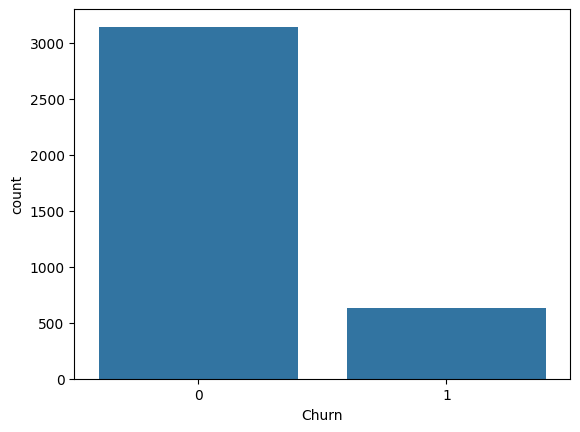

In [ ]:


churn_counts = df['Churn'].value_counts()

print(f"Number of customers who churned: {churn_counts[1]}")
print(f"Number of customers who did not churn: {churn_counts[0]}")

churn_ratio = churn_counts[1] / churn_counts[0]
print(f"Churn ratio: {churn_ratio:.2f}")


sns.countplot(x = 'Churn', data = df)
plt.show()


##4.2 Customer retention rate

In [ ]:

customer_retention_rate = (1 - churn_ratio) * 100
print(f"Customer retention rate: {customer_retention_rate:.2f}%")


Customer retention rate: 79.92%


##4.3 Show Churn and Non-churn user based on Gender

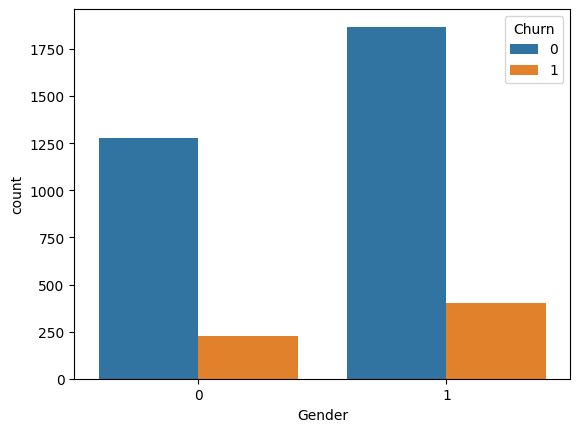

In [ ]:


sns.countplot(x = 'Gender', hue = 'Churn', data = df)
plt.show()


#5. Splitting Data

Splitting data Suing K-Fold

In [ ]:

df = df.reset_index(drop=True)

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize lists to hold train and test sets
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for train_index, test_index in kfold.split(df):
    X_train, X_test = df.drop(columns='Churn').iloc[train_index], df.drop(columns='Churn').iloc[test_index]
    y_train, y_test = df['Churn'].iloc[train_index], df['Churn'].iloc[test_index]

    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Now you have the train and test sets for each fold stored in lists


##5.1 Correlation Matrix

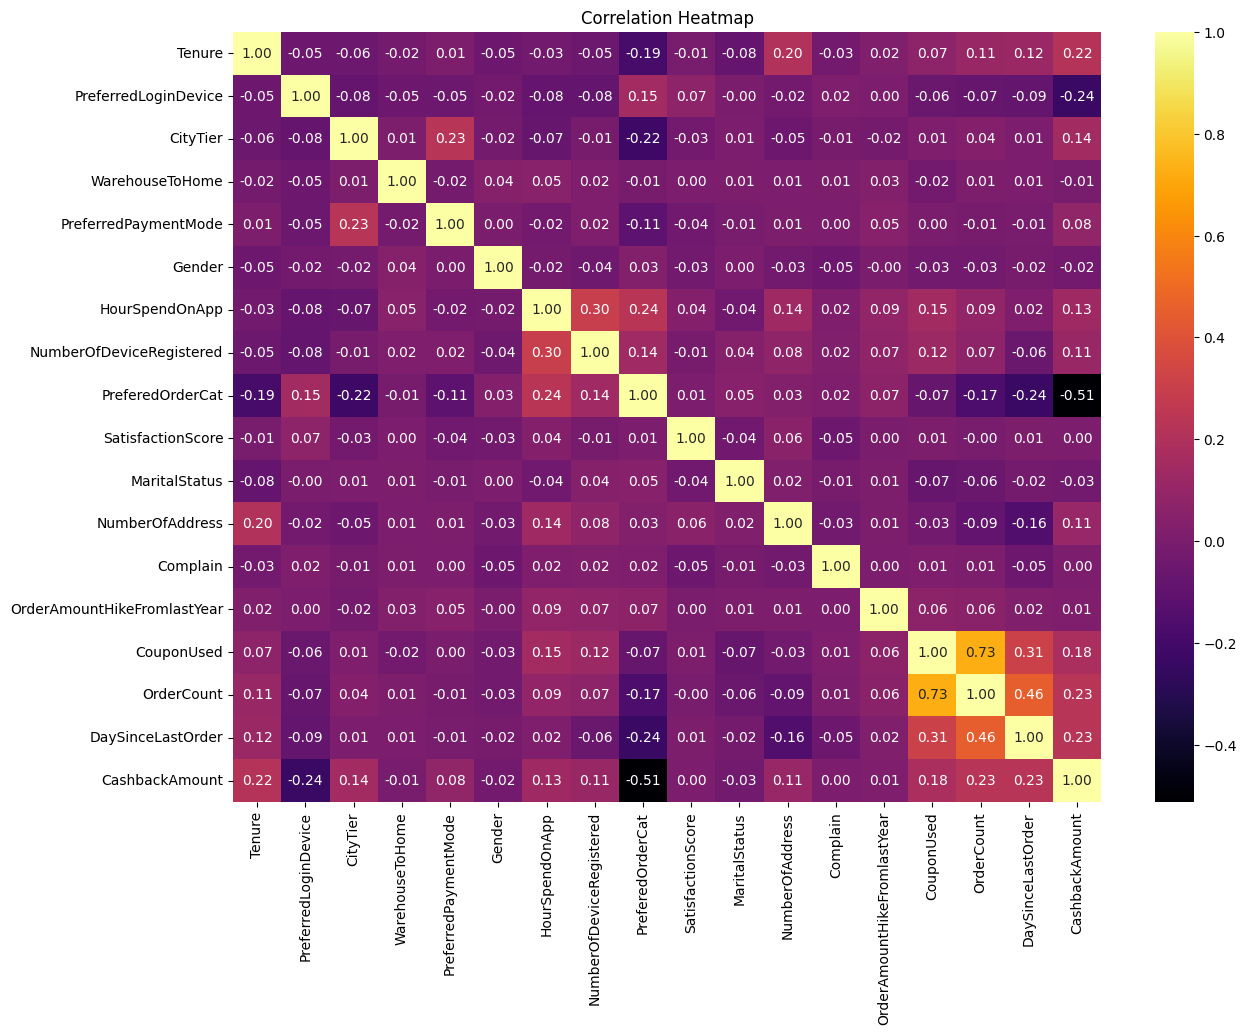

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X_train.corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


#6. Customer Segmentation using K-Means Clustering

####-Train the K-Means clustering model on the training data.
####-Assign cluster labels to the training data.
####-Analyze each cluster by examining the characteristics of the customers in each group.

In [ ]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
train_labels = kmeans.labels_
X_train['Cluster'] = train_labels
for i in range(kmeans.n_clusters):
    cluster_data = X_train[X_train['Cluster'] == i]
    print(f"Cluster {i + 1}:")
    print(f"- Number of customers: {len(cluster_data)}")
    print(f"- Average tenure: {cluster_data['Tenure'].mean():.2f}")
    print(f"- Preferred login device: {cluster_data['PreferredLoginDevice'].mode()[0]}")
    print(f"- Citytier: {cluster_data['CityTier'].mode()[0]}")
    print(f"- Preferred order category: {cluster_data['PreferedOrderCat'].mode()[0]}")
    print()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
- Number of customers: 1434
- Average tenure: 7.42
- Preferred login device: 2
- Citytier: 1
- Preferred order category: 3

Cluster 2:
- Number of customers: 986
- Average tenure: 9.42
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 2

Cluster 3:
- Number of customers: 19
- Average tenure: 20.05
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 4

Cluster 4:
- Number of customers: 571
- Average tenure: 10.63
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 2

Cluster 5:
- Number of customers: 10
- Average tenure: 7.40
- Preferred login device: 1
- Citytier: 1
- Preferred order category: 2



For example, in Cluster 1, there are 2672 customers with an average tenure of 8.98 months. The majority of customers in this cluster prefer login device Mobile phone, belong to city tier 1, and prefer order category Laptop & Accessory.

#7. Visualizing Churn Characteristics

####-Visualize the distribution of customer tenure for churned and non-churned customers.
####-Visualize the distribution of customer satisfaction scores for churned and non-churned customers.


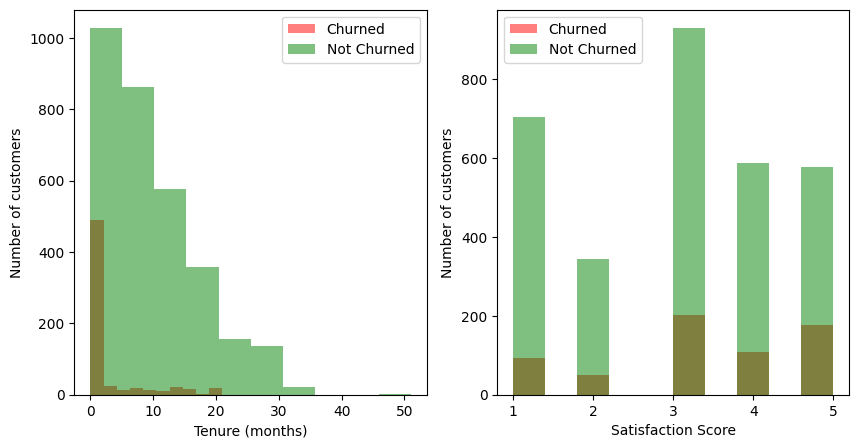

In [ ]:

churn_data = df[df['Churn'] == 1]
non_churn_data = df[df['Churn'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(churn_data['Tenure'], bins=10, label='Churned', color='red', alpha=0.5)
ax1.hist(non_churn_data['Tenure'], bins=10, label='Not Churned', color='green', alpha=0.5)
ax1.set_xlabel('Tenure (months)')
ax1.set_ylabel('Number of customers')
ax1.legend()

ax2.hist(churn_data['SatisfactionScore'], bins=10, label='Churned', color='red', alpha=0.5)
ax2.hist(non_churn_data['SatisfactionScore'], bins=10, label='Not Churned', color='green', alpha=0.5)
ax2.set_xlabel('Satisfaction Score')
ax2.set_ylabel('Number of customers')
ax2.legend()

plt.show()


#8. Balancing the Dataset with SMOTE

##8.1 Apply SMOTE
Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by oversampling the minority class.

##8.2 Check Resampled Class Distribution
Check the distribution of the churned and non-churned classes after applying SMOTE.

##8.3 Visualize Resampled Class Distribution
Visualize the distribution of the churned and non-churned classes after applying SMOTE.

Number of customers who churned after SMOTE: 2525
Number of customers who did not churn after SMOTE: 2525
Churn ratio after SMOTE: 1.00


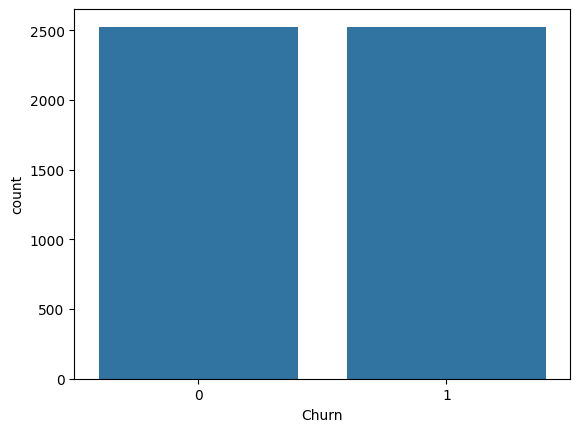

In [ ]:

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

churn_counts_resampled = y_train_resampled.value_counts()

print(f"Number of customers who churned after SMOTE: {churn_counts_resampled[1]}")
print(f"Number of customers who did not churn after SMOTE: {churn_counts_resampled[0]}")

churn_ratio_resampled = churn_counts_resampled[1] / churn_counts_resampled[0]
print(f"Churn ratio after SMOTE: {churn_ratio_resampled:.2f}")

sns.countplot(x='Churn', data=pd.DataFrame(y_train_resampled))
plt.show()


In [ ]:
X_train_resampled.head(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93,1
1,0.0,0,1,22.0,4,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139.19,0
2,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,153.81,0
3,0.0,2,1,15.0,0,1,3.0,4,3,3,0,1,1,17.0,0.0,1.0,0.0,133.88,0
4,9.0,1,3,15.0,3,1,3.0,4,0,2,2,2,0,16.0,0.0,4.0,7.0,196.19,3


In [ ]:
common_features = X_train_resampled.columns.intersection(X_test.columns)
X_train_resampled = X_train_resampled[common_features]
X_test = X_test[common_features]

In [ ]:
X_train_resampled.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,0.0,0,1,22.0,4,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139.19
2,11.0,1,1,6.0,4,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,153.81
3,0.0,2,1,15.0,0,1,3.0,4,3,3,0,1,1,17.0,0.0,1.0,0.0,133.88
4,9.0,1,3,15.0,3,1,3.0,4,0,2,2,2,0,16.0,0.0,4.0,7.0,196.19


#9. Dimensionality Reduction with PCA
##9.1 Apply PCA
Apply Principal Component Analysis (PCA) to the resampled training data to identify the number of components needed to explain the variance.

##9.2 Plot Cumulative Explained Variance
Visualize the cumulative explained variance ratio to determine the optimal number of principal components.

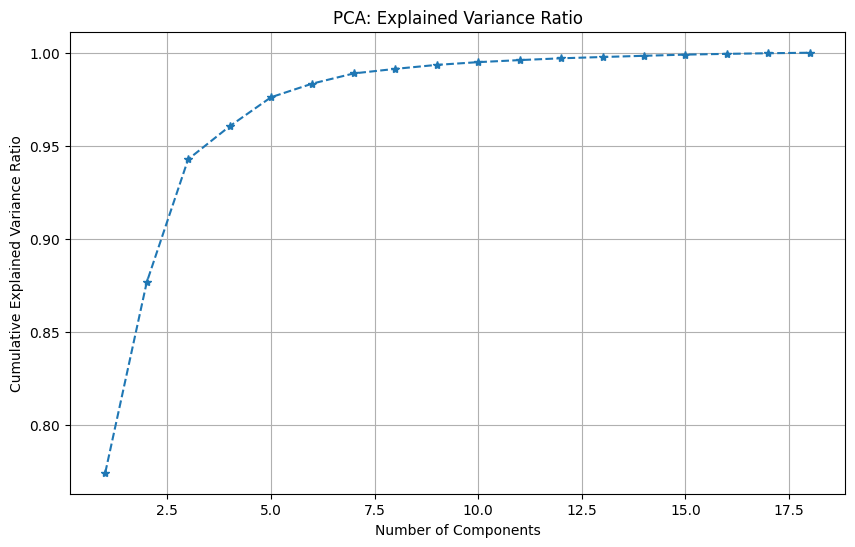

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_resampled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_explained_variance, marker='*', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Apply PCA
common_features = X_train_resampled.columns.intersection(X_test.columns)
X_train_resampled = X_train_resampled[common_features]
X_test = X_test[common_features]

pca = PCA()
pca.fit(X_train_resampled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca_optimal = PCA(n_components=optimal_components)
X_train_pca = pca_optimal.fit_transform(X_train_resampled)
X_test_pca = pca_optimal.transform(X_test)


In [ ]:
X_train_pca

array([[ -2.82013749, -10.15200236,  -3.47627738,  -4.24554169],
       [-23.66451574,   6.64187276,  -2.97955447,   8.54547517],
       [ -8.47723973, -11.17221016,   3.71437307,  -5.23598959],
       ...,
       [-17.45064078,  -8.54450738,  -5.24497169,   1.04570354],
       [-14.54602376,  -7.70881247,  -5.4444794 ,  -3.84192809],
       [ -9.75286876,  16.42517716,  -1.36564701,   6.10534499]])

#10. Logistic Regression Model
##10.1 Train Logistic Regression Model
Train the logistic regression model on the PCA-transformed training data.

##10.2 Evaluate Model Performance
Evaluate the performance of the logistic regression model on the PCA-transformed test data.

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train_resampled)


lr_y_pred = lr_model.predict(X_test_pca)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")
print(f"Confusion Matrix:\n{lr_conf_matrix}")


Logistic Regression Results:
Accuracy: 0.70
Precision: 0.36
Recall: 0.81
F1 Score: 0.50
Confusion Matrix:
[[421 197]
 [ 26 110]]


#11. XGBoost Model
##11.1 Train XGBoost Model
Train the XGBoost classifier on the PCA-transformed training data.

##11.2 Evaluate Model Performance
Evaluate the performance of the XGBoost model on the PCA-transformed test data.

In [ ]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier()
xgb_model.fit(X_train_pca, y_train_resampled)

xgb_y_pred = xgb_model.predict(X_test_pca)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print("XGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1 Score: {xgb_f1:.2f}")
print(f"Confusion Matrix:\n{xgb_conf_matrix}")


XGBoost Results:
Accuracy: 0.92
Precision: 0.72
Recall: 0.90
F1 Score: 0.80
Confusion Matrix:
[[569  49]
 [ 13 123]]


#12. Random Forest Model
##12.1 Train Random Forest Model
Train the Random Forest classifier on the PCA-transformed training data.

##12.2 Evaluate Model Performance
Evaluate the performance of the Random Forest model on the PCA-transformed test data.

In [ ]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca, y_train_resampled)

rf_y_pred = rf_model.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")



Random Forest Results:
Accuracy: 0.94
Precision: 0.82
Recall: 0.88
F1 Score: 0.85
Confusion Matrix:
[[592  26]
 [ 16 120]]


#13. Gradient Boosting Classifier
##13.1 Train GGradient Boosting Classifier Model
Train the Gradient Boosting Classifier on the PCA-transformed training data.

##13.2 Evaluate Model Performance
Evaluate the performance of the Gradient Boosting Classifier on the PCA-transformed test data.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_pca, y_train_resampled)

gb_y_pred = gb_model.predict(X_test_pca)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)

print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1:.2f}")
print(f"Confusion Matrix:\n{gb_conf_matrix}")


Gradient Boosting Results:
Accuracy: 0.79
Precision: 0.46
Recall: 0.77
F1 Score: 0.58
Confusion Matrix:
[[494 124]
 [ 31 105]]


# 14. Ensemble Methods: Bagging and Boosting

## 14.1 Bagging Classifier
Train a Bagging classifier using DecisionTreeClassifier as the base estimator.
##14.2 AdaBoost Classifier
Train an AdaBoost classifier using DecisionTreeClassifier as the base estimator.




In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)
bag_clf.fit(X_train_pca, y_train_resampled)
y_pred_bag = bag_clf.predict(X_test_pca)

bag_accuracy = accuracy_score(y_test, y_pred_bag)
bag_precision = precision_score(y_test, y_pred_bag, average='binary')
bag_recall = recall_score(y_test, y_pred_bag, average='binary')
bag_f1 = f1_score(y_test, y_pred_bag, average='binary')
bag_conf_matrix = confusion_matrix(y_test, y_pred_bag)

print("Bagging Results:")
print(f"Accuracy: {bag_accuracy:.2f}")
print(f"Precision: {bag_precision:.2f}")
print(f"Recall: {bag_recall:.2f}")
print(f"F1 Score: {bag_f1:.2f}")
print(f"Confusion Matrix:\n{bag_conf_matrix}")

ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    learning_rate=0.1,
    random_state=42
)
ada_clf.fit(X_train_pca, y_train_resampled)
y_pred_ada = ada_clf.predict(X_test_pca)

ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada, average='binary')
ada_recall = recall_score(y_test, y_pred_ada, average='binary')
ada_f1 = f1_score(y_test, y_pred_ada, average='binary')
ada_conf_matrix = confusion_matrix(y_test, y_pred_ada)

print("Boosting Results:")
print(f"Accuracy: {ada_accuracy:.2f}")
print(f"Precision: {ada_precision:.2f}")
print(f"Recall: {ada_recall:.2f}")
print(f"F1 Score: {ada_f1:.2f}")
print(f"Confusion Matrix:\n{ada_conf_matrix}")


Bagging Results:
Accuracy: 0.87
Precision: 0.61
Recall: 0.85
F1 Score: 0.71
Confusion Matrix:
[[544  74]
 [ 21 115]]
Boosting Results:
Accuracy: 0.92
Precision: 0.75
Recall: 0.86
F1 Score: 0.80
Confusion Matrix:
[[579  39]
 [ 19 117]]


# 15. Hyperparameter Tuning with GridSearchCV for XGBoost Classifier

## 15.1 Define Parameter Grid
Define the parameter grid for GridSearchCV to optimize XGBoost hyperparameters.
##15.2 Perform Grid Search
Perform GridSearchCV to find the best combination of hyperparameters for the XGBoost classifier.
##15.3 Best Model Evaluation
Evaluate the best XGBoost model found by GridSearchCV on the test set.

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['binary:logistic']
}

xgb_model = XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train_resampled)


print("Best parameters:")
print(grid_search.best_params_)

best_xgb_model = XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train_pca, y_train_resampled)

best_xgb_y_pred = best_xgb_model.predict(X_test_pca)
best_xgb_accuracy = accuracy_score(y_test, best_xgb_y_pred)
best_xgb_precision = precision_score(y_test, best_xgb_y_pred)
best_xgb_recall = recall_score(y_test, best_xgb_y_pred)
best_xgb_f1 = f1_score(y_test, best_xgb_y_pred)
best_xgb_conf_matrix = confusion_matrix(y_test, best_xgb_y_pred)

print("Best XGBoost Results:")
print(f"Accuracy: {best_xgb_accuracy:.2f}")
print(f"Precision: {best_xgb_precision:.2f}")
print(f"Recall: {best_xgb_recall:.2f}")
print(f"F1 Score: {best_xgb_f1:.2f}")
print(f"Confusion Matrix:\n{best_xgb_conf_matrix}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'binary:logistic', 'subsample': 0.7}
Best XGBoost Results:
Accuracy: 0.94
Precision: 0.78
Recall: 0.90
F1 Score: 0.84
Confusion Matrix:
[[584  34]
 [ 14 122]]


# 16. Predicting Churn for New Customer Data

## 16.1 Define and Transform New Customer Data
Define the features of a new customer and transform them using PCA for prediction.

In [ ]:
import numpy as np

customer_data = [
    6,  # Tenure
    2,  # PreferredLoginDevice
    1,  # CityTier
    1,  # WarehouseToHome
    2,  # PreferredPaymentMode
    2,  # Gender
    5,  # HourSpendOnApp
    3,  # NumberOfDeviceRegistered
    2,  # PreferedOrderCat
    5,  # SatisfactionScore
    1,  # MaritalStatus
    9,  # NumberOfAddress
    0,  # Complain
    11,  # OrderAmountHikeFromlastYear
    0,  # CouponUsed
    3,  # OrderCount
    5,  # DaySinceLastOrder
    0  # CashbackAmount
]

new_data = np.array(customer_data).reshape(1, -1)

transformed_data = pca_optimal.transform(new_data)

predictions = best_xgb_model.predict(transformed_data)
print(predictions)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(



Insights:

- **Tenure:** Customers with higher tenure are less likely to churn. The business should focus on retaining existing customers by providing excellent service and loyalty programs.
- **PreferredLoginDevice:** Customers who prefer to use mobile phones for login are more likely to churn. The business should improve the mobile app experience and make it more user-friendly.
- **SatisfactionScore:** Customers with low satisfaction scores are more likely to churn. The business should focus on improving customer satisfaction by addressing their concerns and resolving issues promptly.
- **OrderCount:** Customers who place fewer orders are more likely to churn. The business should encourage customers to place more orders by offering discounts and promotions.
- **DaySinceLastOrder:** Customers who have not placed an order in a long time are more likely to churn. The business should reach out to these customers and offer them incentives to place an order.

**Recommendations:**

- **Implement a loyalty program:** Offer rewards to customers who stay with the business for a long time. This could include things like discounts, free shipping, or exclusive access to products and services.
- **Improve the mobile app experience:** Make the app more user-friendly and efficient. This could include adding features such as a faster checkout process, a more intuitive interface, and better customer support.
- **Address customer concerns:** Respond to customer complaints and issues promptly and effectively. This shows customers that the business values their feedback and is committed to resolving their problems.
- **Offer discounts and promotions:** Encourage customers to place more orders by offering discounts and promotions. This could include things like free shipping on orders over a certain amount, or a percentage off of their next order.
- **Reach out to inactive customers:** Contact customers who have not placed an order in a long time and offer them incentives to place an order. This could include things like a discount on their next order, or a free gift.

By implementing these recommendations, the business can reduce customer churn and improve customer retention.


Based on the F1 scores and considering the latest hyperparameter-tuned XGBoost model:

XGBoost (F1 Score: 0.84) performs the best among the single models.
Among the ensemble methods, Random Forest (F1 Score: 0.85) achieves the highest F1 score, followed closely by Boosting (F1 Score: 0.80).